# Start

**Importing libraries those are used for our project**

In [549]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib import rc
import matplotlib.patches as mpatches

import seaborn as sns


#Libraries for the modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, plot_confusion_matrix

**The data we are taking from online sources is stored in these variables**

In [462]:
url1 = 'https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/mwc22/mwc22-client_table.csv'

url2 = 'https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/mwc22/mwc22-orders_table.csv'

url3 = 'https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/mwc22/mwc22-client_table+-+test_x.csv'

**Reading the CSV files**

In [463]:
clientDF = pd.read_csv(url1, decimal=',')

ordersDF = pd.read_csv(url2)

testDF = pd.read_csv(url3, decimal=',')

In [566]:
clientDF.head()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,67.25,201.75,0
1,24321859,2,58.33,350.00,0
2,24321880,3,46.67,112.00,0
3,24321957,2,50.00,600.00,0
4,24321962,4,10.00,120.00,0


In [567]:
ordersDF.head()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


In [568]:
testDF.head()

,CLIENT ID,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,48352078,8.33,100.00,0
1,18072186,93.42,186.83,1
2,48352246,45.83,137.50,0
3,18070621,16.67,200.00,1
4,48352262,13.33,160.00,0


# Pre processing 

**Checking NA**

**We just check NA, There is no NA found in the BOTH data set.**

**Checking DUPLICATES**

**1. There are no Duplicates in clientDF**

In [9]:
#For data set 1
duplicateRows_clientDF = clientDF[clientDF.duplicated()]

In [10]:
duplicateRows_clientDF

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION


**2. There are 616 in orderDF and we delete them.**

In [11]:
#For data set 2
duplicateRows_ordersDF = ordersDF[ordersDF.duplicated()]

In [12]:
duplicateRows_ordersDF

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
44,18073169,3,675518868,Kiwi
145,18085027,2,667270285,Orange
296,18102594,1,675879875,Orange
444,18122931,5,672907483,Kiwi
561,18138968,2,675881310,Orange
...,...,...,...,...
66596,48020988,1,675320648,Plum
66599,48020988,1,675320648,Mango
66658,48113220,1,670847037,Kiwi
66832,48277042,1,675961369,Lime


In [13]:
#Droping Duplicate Rows from DF2, keeping the first of them.
ordersDF = ordersDF.drop_duplicates(keep = 'first').reset_index(drop = True)

In [14]:
len(ordersDF)

66296

# EDA (Exploratory Data Analysis)

## EDA with Clients Data frame

### Here is the total number of clients

In [38]:
total_clients = len(clientDF['CLIENT ID'])
total_clients

35884

### Counting the number of clients according to the segment

In [72]:
no_clients = clientDF.groupby(['CLIENT_SEGMENT'])['CLIENT ID'].count().reset_index()

In [73]:
no_clients

,CLIENT_SEGMENT,CLIENT ID
0,1,6505
1,2,6760
2,3,8123
3,4,7927
4,5,3429
5,6,3140


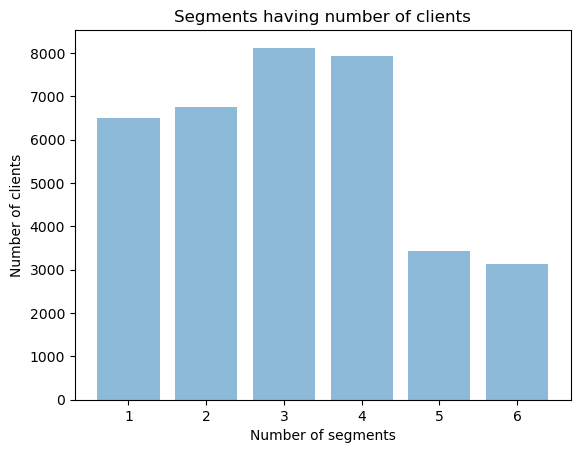

In [74]:
plt.bar(no_clients['CLIENT_SEGMENT'], no_clients['CLIENT ID'], align='center', alpha=0.5)
plt.xticks(no_clients['CLIENT_SEGMENT'])
plt.xlabel('Number of segments')
plt.ylabel('Number of clients')
plt.title('Segments having number of clients')

plt.show()

In this graph we see that Nuwe Fruits divided their customers into 6 segments.

### Focus on the "promotion received" regarding the segments and the percentage of the clients

In [87]:
x = clientDF.groupby(['CLIENT_SEGMENT'])['CLIENT ID'].count()

In [88]:
y = clientDF.groupby(['CLIENT_SEGMENT', 'RECEIVED_COMMUNICATION']).count()['CLIENT ID']

In [127]:
z = round(y/x * 100)
z = pd.DataFrame(z)
z.rename(columns={'CLIENT ID': '%_of_client'})

%_of_client
CLIENT_SEGMENT RECEIVED_COMMUNICATION             
1              0                              42.0
               1                              58.0
2              0                              44.0
               1                              56.0
3              0                              46.0
               1                              54.0
4              0                              55.0
               1                              45.0
5              0                              75.0
               1                              25.0
6              0                              42.0
               1                              58.0

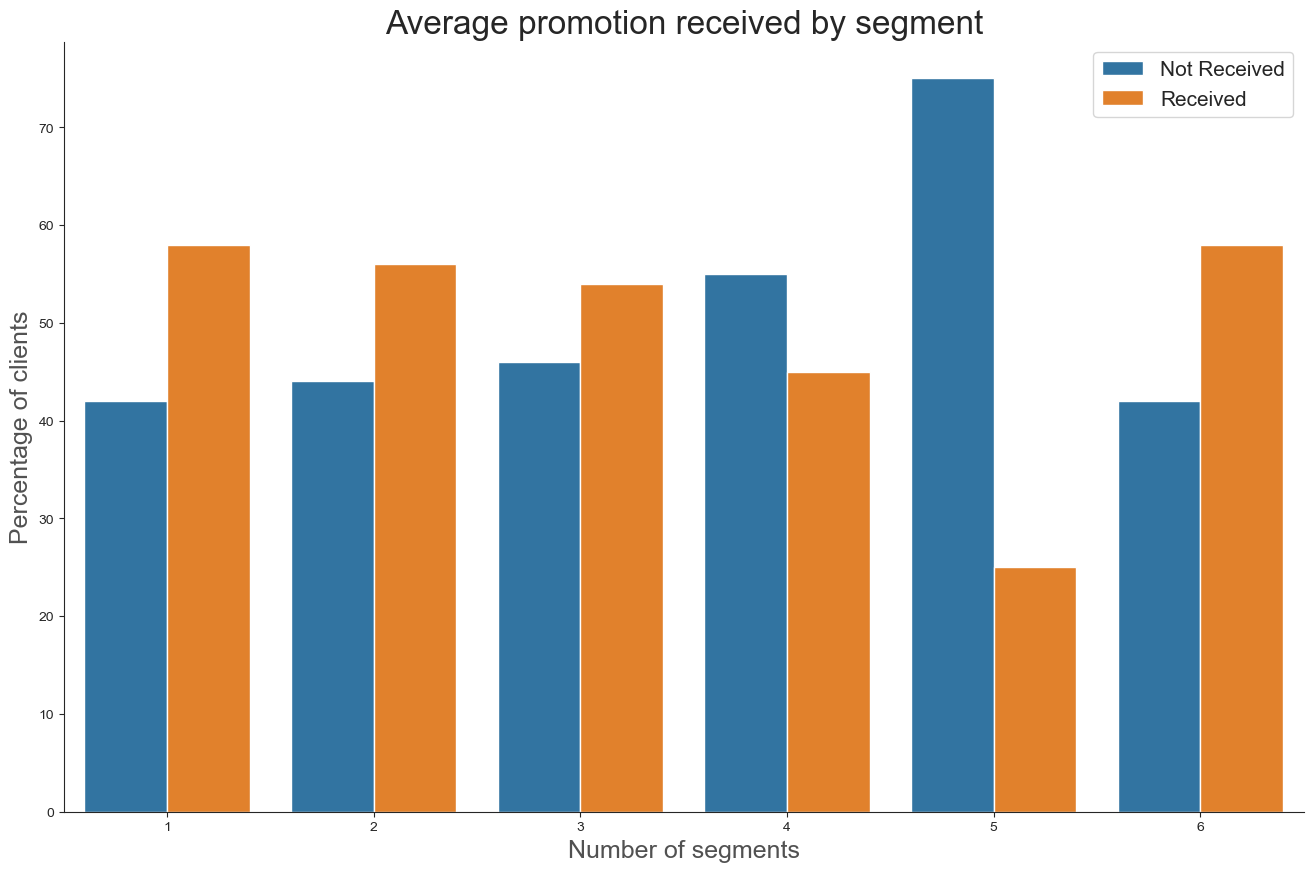

In [129]:
zm = z.reset_index()

zm['RECEIVED_COMMUNICATION'] = zm['RECEIVED_COMMUNICATION'].replace([0,1],['Not Received', 'Received'])

plt.figure(figsize=(16,10));
sns.set_style('ticks')
ax = sns.barplot(data=zm, 
                 x='CLIENT_SEGMENT', 
                 y='CLIENT ID', 
                 hue='RECEIVED_COMMUNICATION')

ax.set_xlabel("Number of segments", fontsize=18, alpha=0.8)
ax.set_ylabel("Percentage of clients", fontsize=18, alpha=0.8)
ax.set_title("Average promotion received by segment", fontsize=24)
ax.legend(fontsize=15)
sns.despine()
plt.show()

In this graph we see that 6 segments are distributed according to the promotion, those received and not received shown in graph respectively.

###  Avg CONSUMPTION And Avg BASKET SIZE regarding segment 

**Avg CONSUMPTION**

In [160]:
avg_con = clientDF.groupby(['CLIENT_SEGMENT']).agg({'AVG CONSO':'mean'}).round(2)

In [161]:
avg_con

,AVG CONSO
CLIENT_SEGMENT,
1,132.28
2,87.36
3,43.33
4,20.87
5,6.60
6,103.40


Text(0.5, 1.0, 'Average consumption by segment')

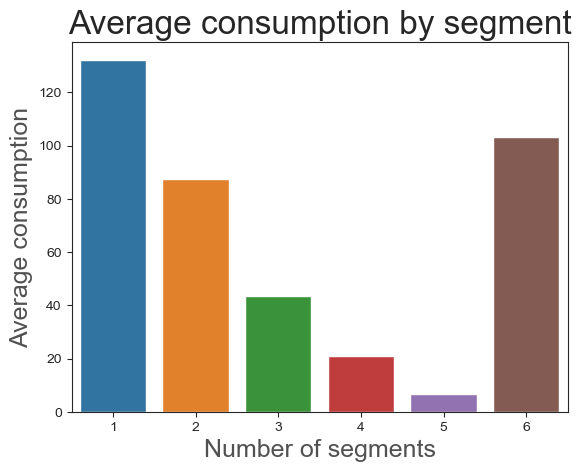

In [175]:
avg_cons = clientDF.groupby(['CLIENT_SEGMENT'])['AVG CONSO'].mean().reset_index()
ax = sns.barplot(data=avg_cons, 
                 x='CLIENT_SEGMENT', 
                 y='AVG CONSO')
ax.set_xlabel("Number of segments", fontsize=18, alpha=0.8)
ax.set_ylabel("Average consumption", fontsize=18, alpha=0.8)
ax.set_title("Average consumption by segment", fontsize=24)



**Avg BASKET SIZE**

In [170]:
avg_bask = clientDF.groupby(['CLIENT_SEGMENT']).agg({'AVG BASKET SIZE':'mean'}).round(2)

In [171]:
avg_bask

,AVG BASKET SIZE
CLIENT_SEGMENT,
1,190.34
2,298.60
3,163.60
4,105.48
5,56.87
6,282.21


Text(0.5, 1.0, 'Average Basket by segment')

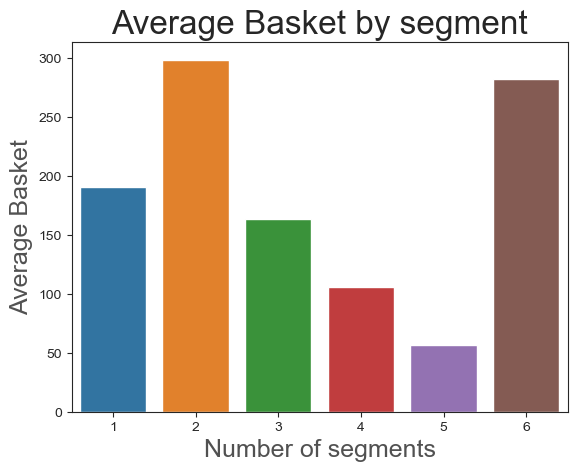

In [186]:
avg_bas = clientDF.groupby(['CLIENT_SEGMENT'])['AVG BASKET SIZE'].mean().reset_index()
ax = sns.barplot(data=avg_bas, 
                 x='CLIENT_SEGMENT', 
                 y='AVG BASKET SIZE')
ax.set_xlabel("Number of segments", fontsize=18, alpha=0.8)
ax.set_ylabel("Average Basket", fontsize=18, alpha=0.8)
ax.set_title("Average Basket by segment", fontsize=24)

### Promotion and average basket size

Text(0.5, 1.0, 'Average Basket size by Promotion')

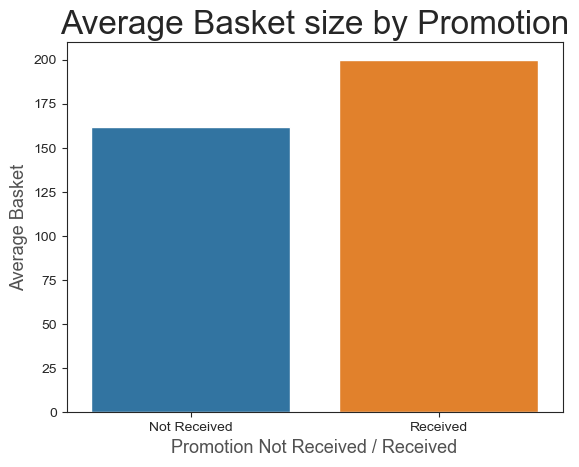

In [302]:
abs_p = clientDF.groupby(['RECEIVED_COMMUNICATION'])['AVG BASKET SIZE'].mean().reset_index()
abs_p['RECEIVED_COMMUNICATION'] = abs_p['RECEIVED_COMMUNICATION'].replace([0,1],['Not Received', 'Received'])


ax = sns.barplot(data=abs_p, 
                 x='RECEIVED_COMMUNICATION', 
                 y='AVG BASKET SIZE')
ax.set_xlabel("Promotion Not Received / Received", fontsize=13, alpha=0.8)
ax.set_ylabel("Average Basket", fontsize=13, alpha=0.8)
ax.set_title("Average Basket size by Promotion", fontsize=24)

Text(0.5, 1.0, 'Average consumption by Promtion')

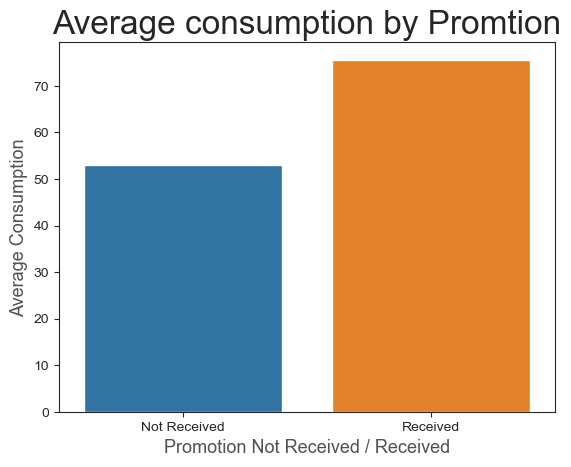

In [305]:
av_p = clientDF.groupby(['RECEIVED_COMMUNICATION'])['AVG CONSO'].mean().reset_index()
av_p['RECEIVED_COMMUNICATION'] = av_p['RECEIVED_COMMUNICATION'].replace([0,1],['Not Received', 'Received'])



ax = sns.barplot(data=av_p, 
                 x='RECEIVED_COMMUNICATION', 
                 y='AVG CONSO')
ax.set_xlabel("Promotion Not Received / Received", fontsize=13, alpha=0.8)
ax.set_ylabel("Average Consumption", fontsize=13, alpha=0.8)
ax.set_title("Average consumption by Promtion", fontsize=24)

Text(0.5, 1.0, 'Average Consumed')

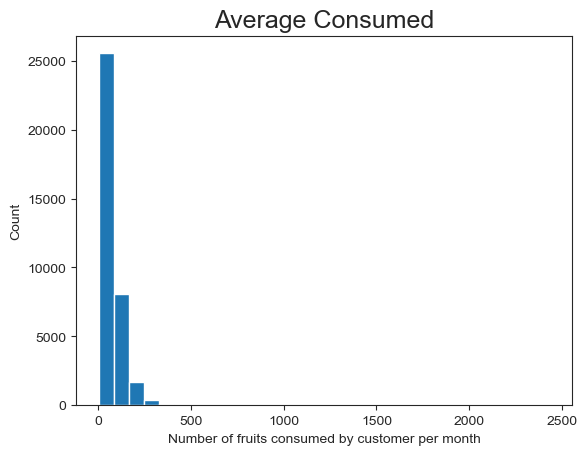

In [314]:
plt.hist(clientDF['AVG CONSO'], bins=30)  
plt.ylabel('Count')
plt.xlabel('Number of fruits consumed by customer per month')
plt.title('Average Consumed', fontsize=18)

Text(0.5, 1.0, 'Average Basket Size')

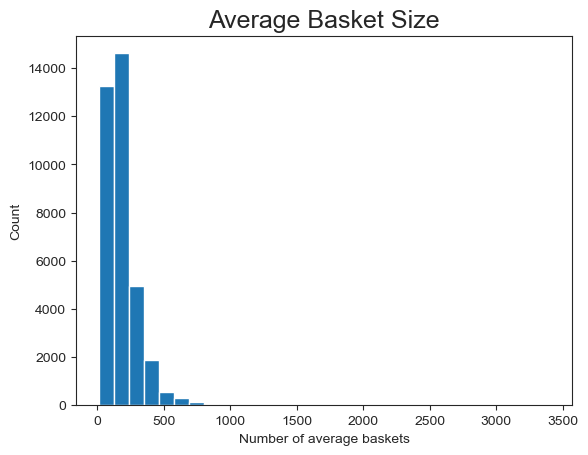

In [313]:
plt.hist(clientDF['AVG BASKET SIZE'], bins=30)  
plt.ylabel('Count')
plt.xlabel('Number of average baskets')
plt.title('Average Basket Size', fontsize=18)

## EDA with Orders Data frame

### Here is the total number of orders

In [343]:
total_oreders = ordersDF.groupby('ORDER ID').count()
total_oreders

,CLIENT ID,NB PRODS,FRUIT_PRODUCT
ORDER ID,,,
663833537,7,7,7
663838488,2,2,2
663838938,2,2,2
664118702,2,2,2
664119692,1,1,1
...,...,...,...
679591618,2,2,2
680763941,2,2,2
680775979,1,1,1


Text(0.5, 0, 'FRUITS PRODUCT')

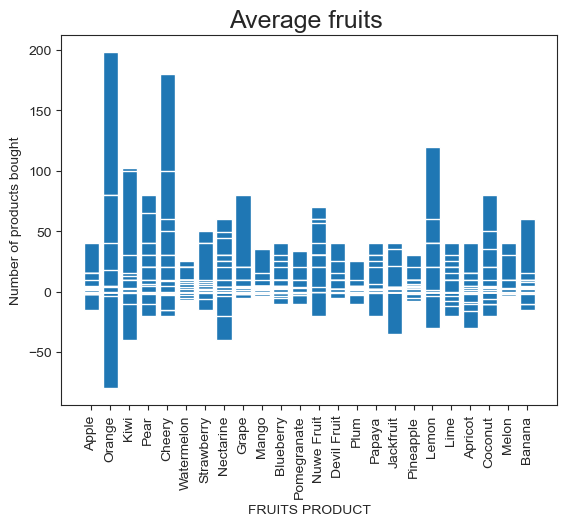

In [375]:
plt.bar(ordersDF['FRUIT_PRODUCT'], ordersDF['NB PRODS'])  
plt.title('Average fruits ', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Number of products bought')
plt.xlabel('FRUITS PRODUCT')

# Base line model

In [569]:
#features
X = clientDF.copy()
X = X.iloc[:,2:5]

#target
y = clientDF.copy()
y = y.iloc[:,[1]]

#Spliting the data into TRAIN AND TEST...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [570]:
#Modeling (Classification)
algo = RandomForestClassifier(random_state=123)
model = algo.fit(X_train, y_train)

<ipython-input-570-ec6bc6cf3f40>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = algo.fit(X_train, y_train)


In [571]:
#Predictions
preds = model.predict(X_test)

print(classification_report(y_test, preds))
f1_score(y_test, preds, average=None)

              precision    recall  f1-score   support

           1       0.87      0.92      0.90      1967
           2       0.81      0.88      0.84      2000
           3       0.76      0.80      0.78      2518
           4       0.74      0.75      0.74      2321
           5       0.72      0.84      0.77      1031
           6       0.30      0.09      0.13       929

    accuracy                           0.77     10766
   macro avg       0.70      0.71      0.69     10766
weighted avg       0.74      0.77      0.75     10766



array([0.89573577, 0.84205496, 0.77655252, 0.74285714, 0.77191413,
       0.13389121])

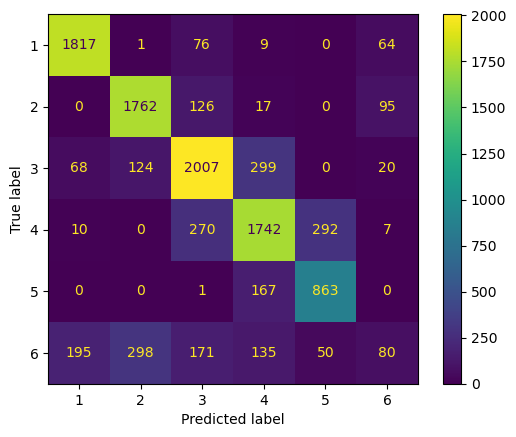

In [587]:
#Ploting confusion matirx for the classification problem to see where we are 
#right and wrong according to our model.

plot_confusion_matrix(model, X_test, y_test)

## Cross validation and Hyper parameter tunning

In [550]:
rfc = RandomForestClassifier(random_state=42)

In [551]:
param_dist = {
    'n_estimators': list(range(50, 300, 10)),
    'min_samples_leaf': list(range(1, 50)),
    'max_depth': list(range(2, 20)),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [552]:
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, cv= 10)

In [553]:
CV_rfc.fit(X_train, y_train)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'n_estimators': [50, 60, 70, 80

In [554]:
CV_rfc.best_params_

{'n_estimators': 270,
 'min_samples_leaf': 16,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

In [573]:
rfc = RandomForestClassifier(   min_samples_leaf=16,
                                max_depth=8,
                                n_estimators=270,
                                max_features='auto',
                                bootstrap = True)

In [574]:
model_rfc_build = rfc.fit(X_train, y_train)



<ipython-input-574-a4610c773676>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc_build = rfc.fit(X_train, y_train)


In [575]:
pred = model_rfc_build.predict(X_test)

In [576]:
print(classification_report(y_test, pred))
f1_score(y_test, pred, average=None)

              precision    recall  f1-score   support

           1       0.87      0.96      0.91      1967
           2       0.82      0.89      0.85      2000
           3       0.75      0.84      0.79      2518
           4       0.73      0.78      0.75      2321
           5       0.76      0.76      0.76      1031
           6       0.53      0.06      0.11       929

    accuracy                           0.78     10766
   macro avg       0.74      0.71      0.70     10766
weighted avg       0.76      0.78      0.76     10766



array([0.91085271, 0.85434575, 0.79342548, 0.7539267 , 0.76120858,
       0.10821256])

## For test data set 

In [582]:
X_holdOut = testDF.iloc[:,1:4]

In [583]:
preds = model_rfc_build.predict(X_holdOut)

preds

array([4, 1, 3, 4, 4, 4, 4, 3, 4, 1, 1, 1, 2, 5, 1, 3, 3, 1, 1])

In [584]:
results = testDF.iloc[:, [0]]

In [585]:
results['CLIENT_SEGMENT'] = preds

<ipython-input-585-554d2c3fc13b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['CLIENT_SEGMENT'] = preds


In [586]:
results

,CLIENT ID,CLIENT_SEGMENT
0,48352078,4
1,18072186,1
2,48352246,3
3,18070621,4
4,48352262,4
5,48359553,4
6,18071647,4
7,48359574,3
8,48359627,4
9,18070505,1


In [604]:
#results.to_csv('results.csv',index=False)

# Merging two data frames 

In [596]:
byOrder=ordersDF.groupby(['CLIENT ID','ORDER ID']).sum().reset_index().sort_values('CLIENT ID')

In [597]:
orderNumber=byOrder.groupby(['CLIENT ID']).mean()

In [598]:
orderNumber.reset_index()

,CLIENT ID,ORDER ID,NB PRODS
0,18070505,671907264.0,35.0
1,18071016,675229714.0,50.0
2,18071233,673537725.0,30.0
3,18071668,672334032.5,10.5
4,18072186,676679128.0,15.0
...,...,...,...
14494,48341696,668906445.0,10.0
14495,48341727,678012260.0,20.0
14496,48352045,670065547.0,10.0
14497,48365750,670187349.0,10.0


In [599]:
clientNumber=clientDF.sort_values(by='CLIENT ID')[['CLIENT ID','AVG BASKET SIZE']]

In [600]:
mergedLeft = clientNumber.merge(orderNumber, on='CLIENT ID', how='outer', indicator=True)

In [601]:
mergedLeft.drop(columns='ORDER ID', inplace=True)

In [602]:
mergedLeft['NB PRODS']=mergedLeft['NB PRODS']*10

In [603]:
mergedLeft.groupby('_merge').count()['CLIENT ID']

_merge
left_only     21392
right_only        7
both          14492
Name: CLIENT ID, dtype: int64

# Assumption and conclusions

The data frames are given us from the Nuwefruit startup. 

**Analyze sales and customer activity**
According to EDA (exploratory data analyst) of clientDF, we saw that more clients are present in 3rd and 4th segments of the nuwe fruits.
We know that there are 6 segments of customers but we dont know how they divided them into these segmeants. 

**Evaluate the impact of the promotion**
There are some impacts of promotions on the sales of Nuwe fruits.
As we see on the graph 3.1.3 we found that from the segment 1 to 5 segment promotion is decreased and then increased in the 6th segment. 
Average consumption and average basket size is also dependent on the promotion. These are also shown in graph 3.1.4

**Fruits Data frame**
There are 20 fruits present in fruits data frame, but 18 fruits are real fruits and 2 of them called Nuwe fruit and devil fruit may be these 2 are processed fruits. 
In fruits data frame there is a varible called number of products which have some values in negative numbers. Maybe the customers returns the products to Nuwe fruits. 

**Combine two data frames**
When we merge these two data frames we found that there are 14492 customers who present in both data frames. And other customers are not present in both data frames 